## Cycle Test 3- Assignment 

### Name: Vinod A - DS2022 batch

### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/LifeExpectancyData/LifeExpectancyData.csv


In [7]:
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

#### Load the life expectancy dataset and print the first five observations

In [67]:
# type your code here
df_life_exp = pd.read_csv('../input/LifeExpectancyData/LifeExpectancyData.csv')
df_life_exp.head()

Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210    33736494   
1   58.0               8.18        62.0       0.1  612.696514      327582   
2   62.0               8.13        64.0       0.1  631.744976    31731688   
3   67.0               8.52        67.0       0.1  669.959000     3696958   
4   68.0               7.87        68.0       0.1   63.537231     2978599   

   Thinness  1-19 years Thinness 5-9 years  Income composition of resources  \
0                  17.2               17.3                            0.479   
1                  17.5               17.5                            0.476   
2                  17.7               17.7                            0.470   
3                  17.9               18.0                            0.463   
4                  18.2               18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

#### Plot the following plots and write the inferences (5 marks)

(i) Pair plot

(ii) Dist Plot

(iii)Box plot

(iv) Violin plot

(v) swarn plot

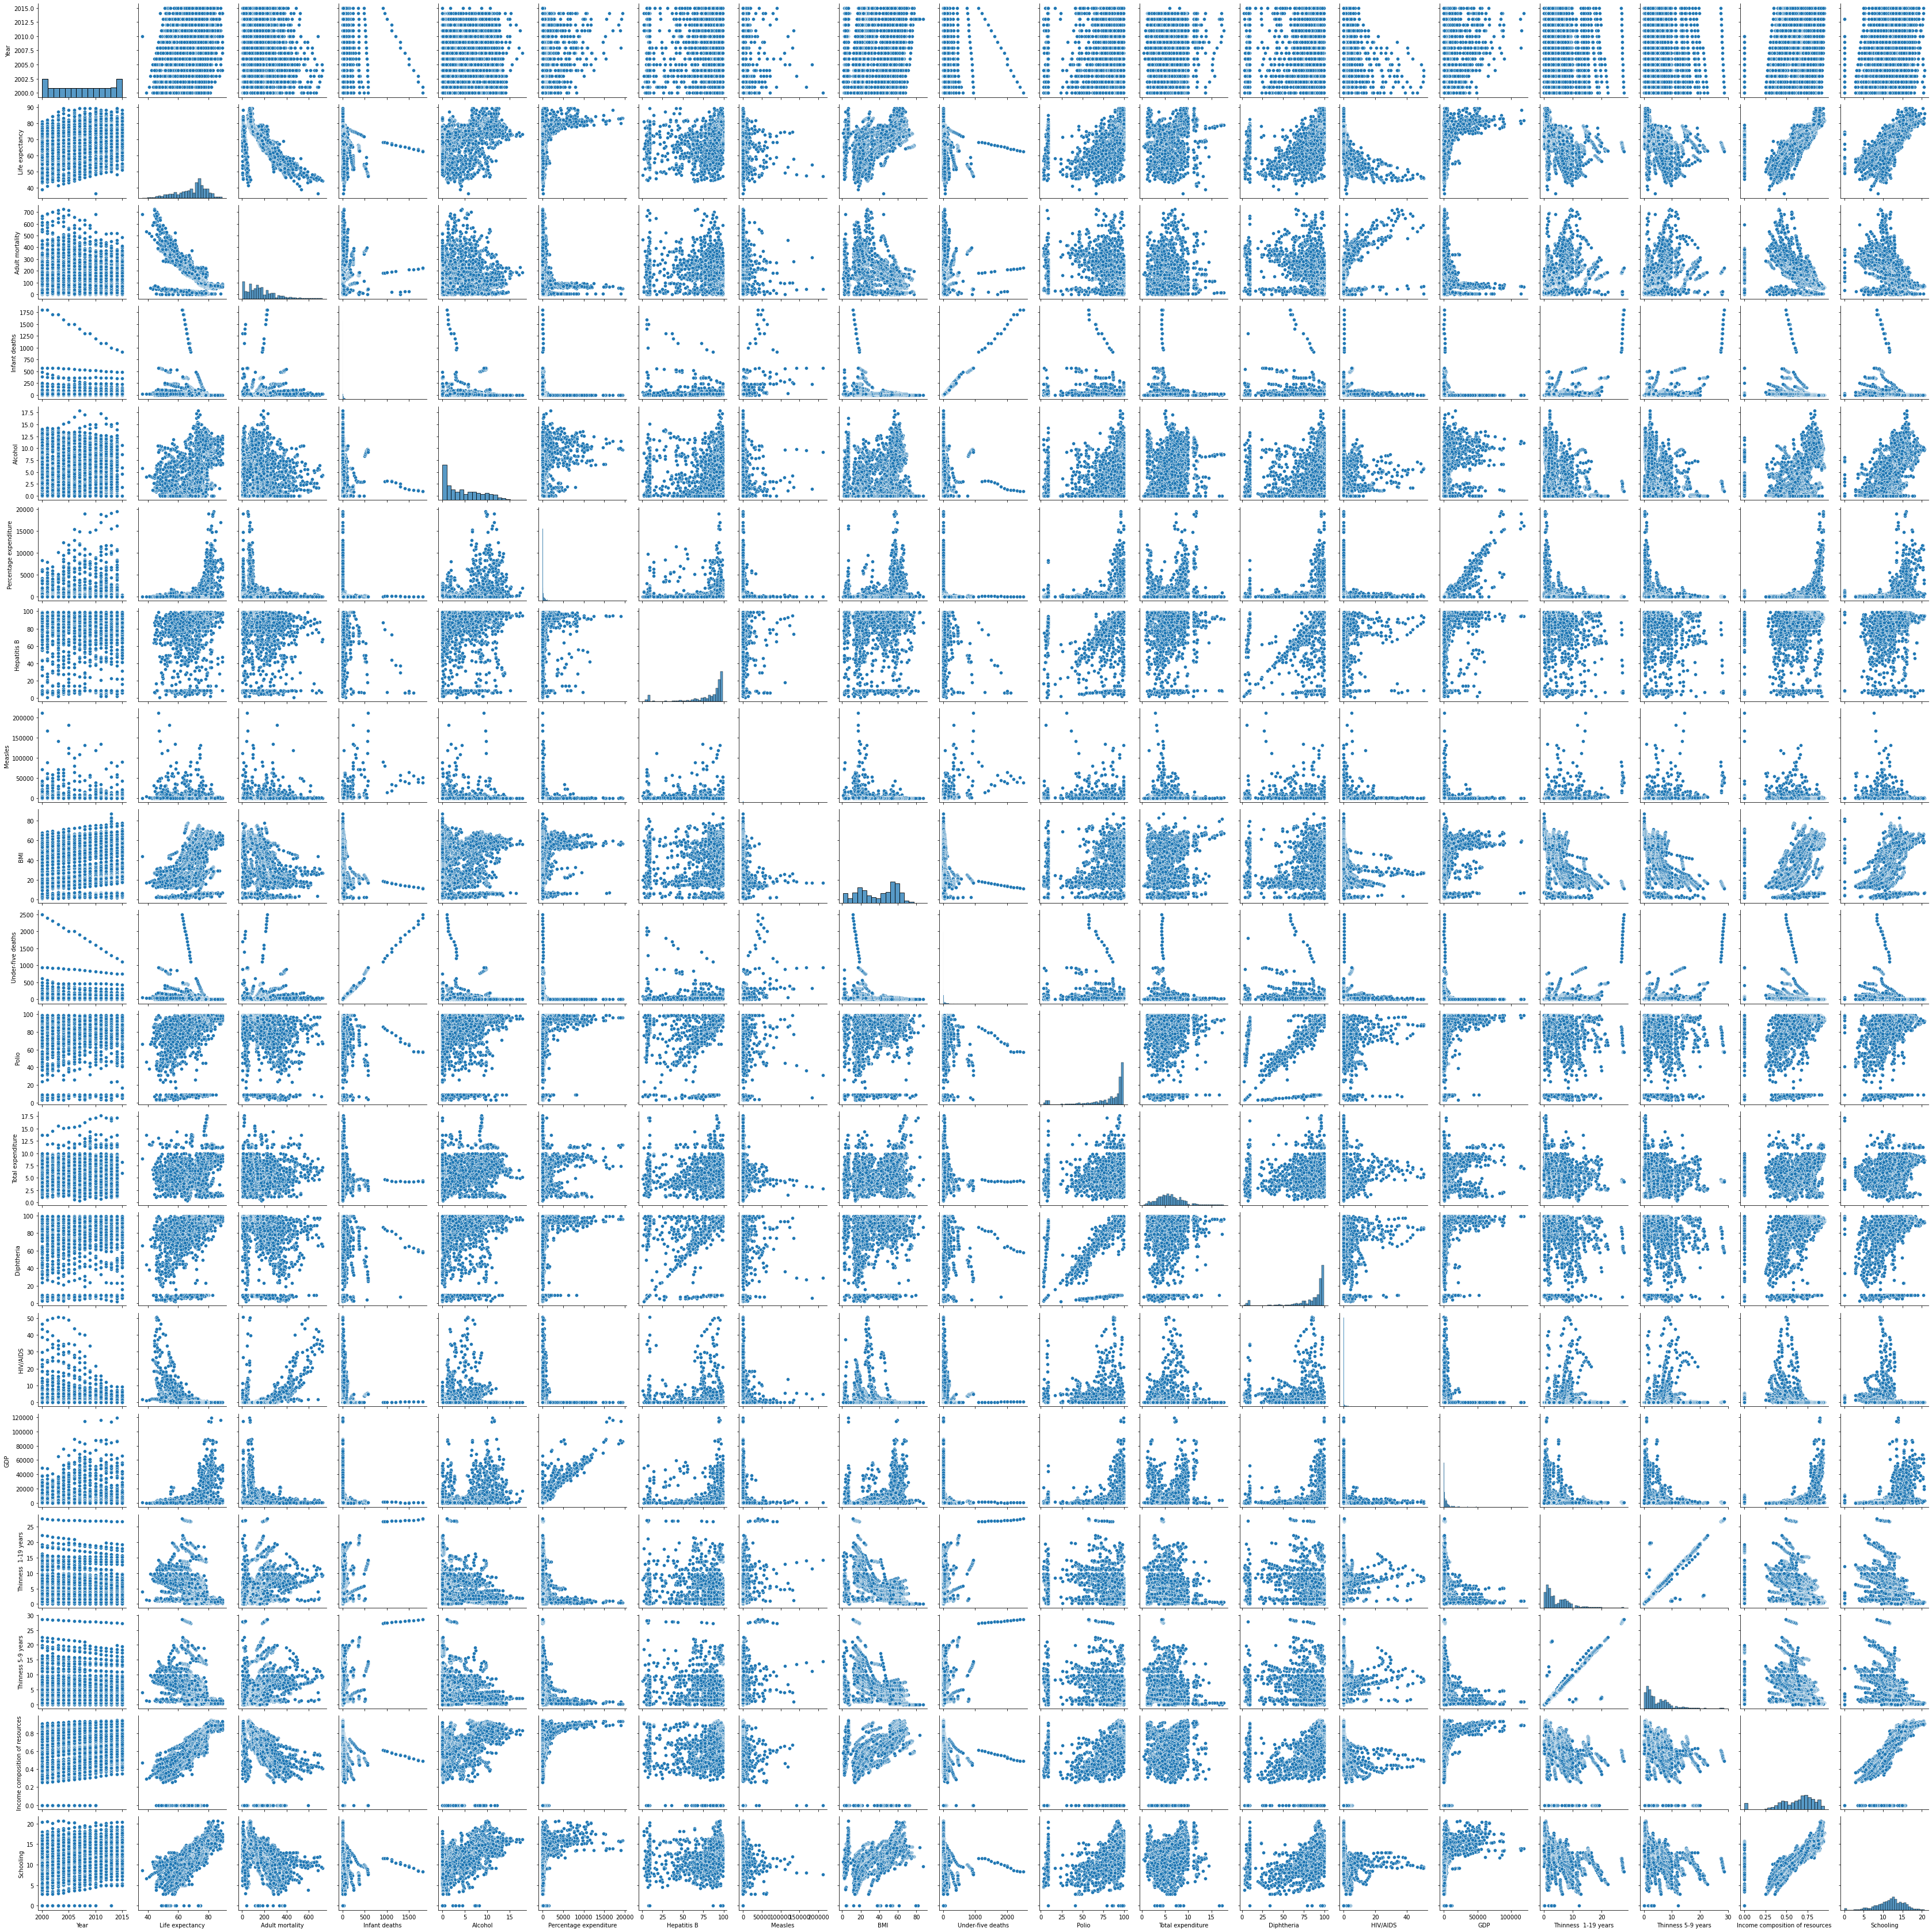

In [10]:
sns.pairplot(df_life_exp.select_dtypes(exclude='object'))
plt.show()

###  INFERENCE: <font color='blue'> Pairplot allows us to plot pairwise relationships between variables within a dataset. It helps us  understand data by summarising large amount of data in a single picture.The main-diagonal subplots are the univariate distributions ( here kernel density estimate (KDE) for each attribute.</font>

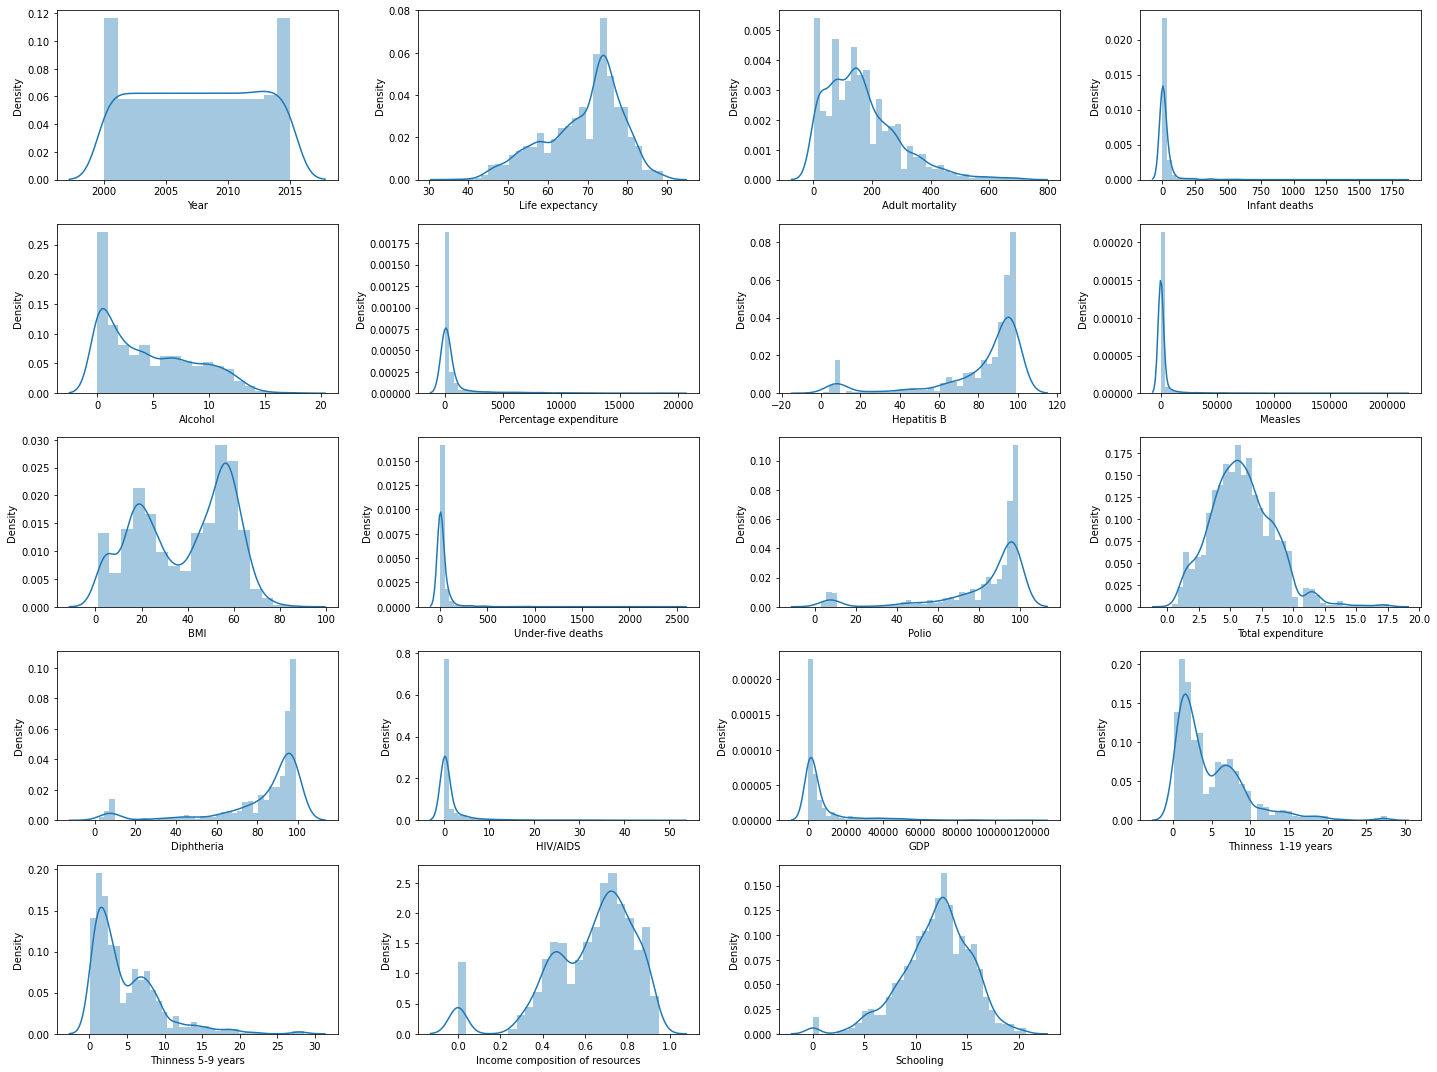

In [11]:
col = df_life_exp.select_dtypes(exclude='object').columns
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(round(len(col)/4),4,i+1)
    sns.distplot(df_life_exp[col[i]])
plt.tight_layout()
plt.show()

###  INFERENCE: <font color='blue'> Distplot or distribution plot, depicts the variation in the data distribution. It represents distribution for continuous data variables. It depicts data by a histogram and a line in combination to it. The distplot represents the univariate distribution i.e. data distribution of a variable against the density distribution. The y-axis is the probability density function for the kernel density estimation.</font>


In [12]:
col = df_life_exp.select_dtypes(exclude='object').columns
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(round(len(col)/4),4,i+1)
    sns.boxplot(df_life_exp[col[i]])
plt.tight_layout()
plt.show()

###  INFERENCE: <font color='blue'> Box plot shows the distribution of quantitative data. Commonly used for Univariate analysis. It can also be used in comparison with one or more categorical variables.The other name for box plot is 'box-and-whisker' plot. It is usefult to visualize the descriptive statistics of a variable. The 'box' shows quartiles of the dataset while 'whiskers' shows the rest of the distribution. Boxplot are very good to visualize distributions and have a look on the minimum, maximum, 1st quartile and 3rd quartile values of the data.</font>


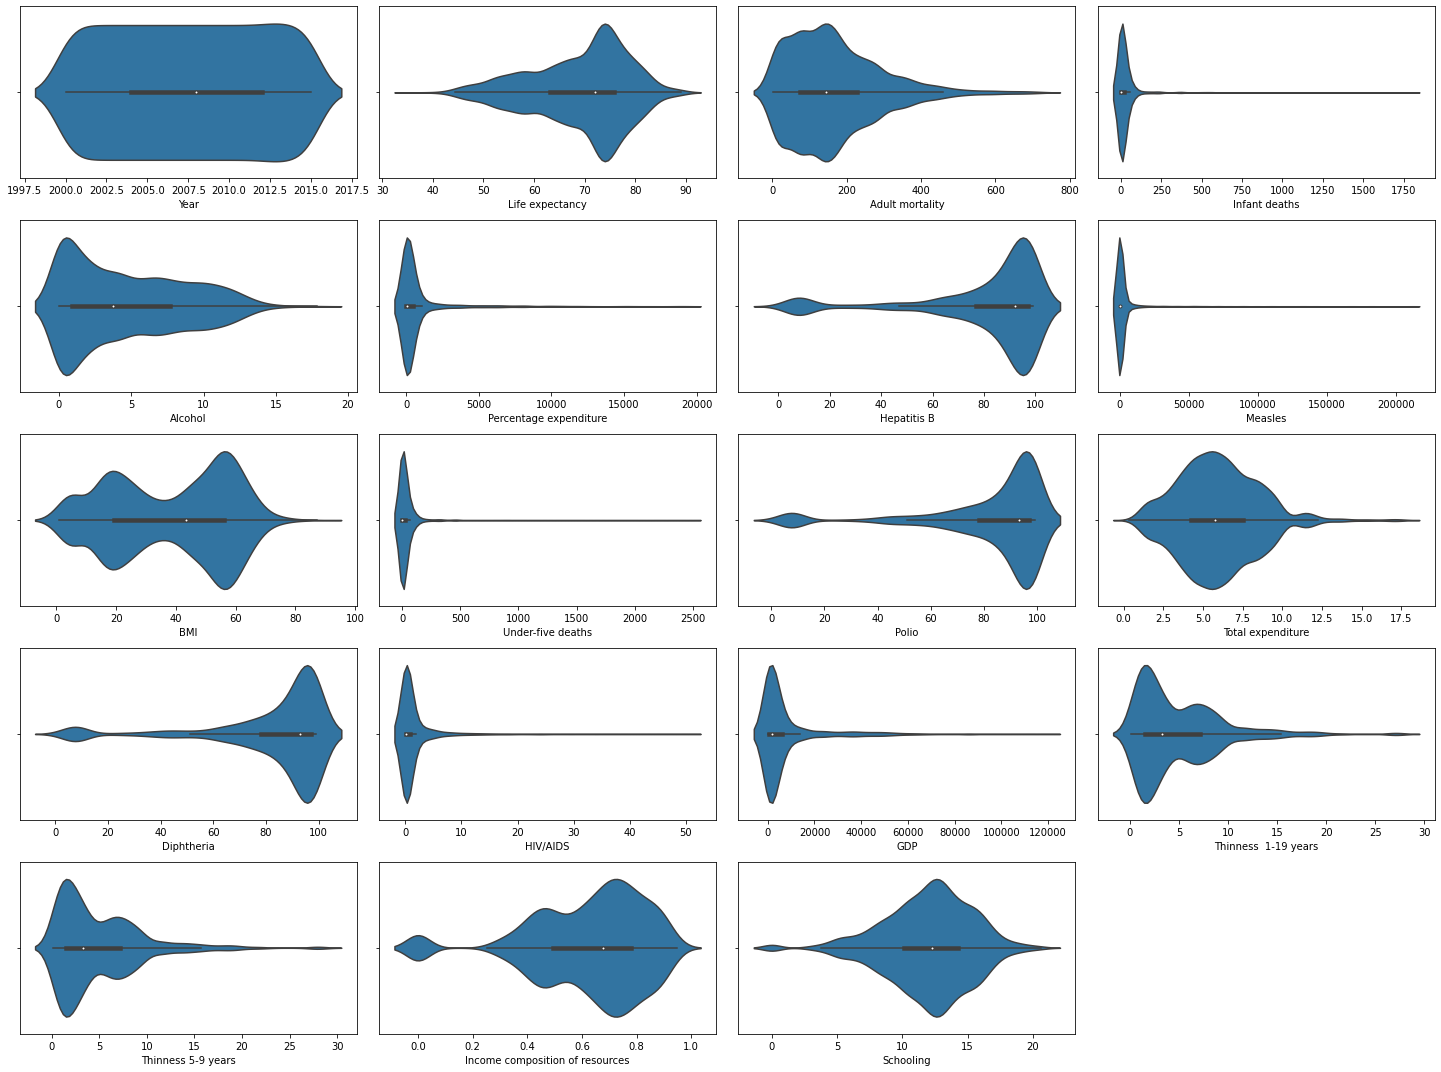

In [13]:
col = df_life_exp.select_dtypes(exclude='object').columns
plt.figure(figsize=(20,15))
for i in range(len(col)):
    plt.subplot(round(len(col)/4),4,i+1)
    sns.violinplot(df_life_exp[col[i]])
plt.tight_layout()
plt.show()

###  INFERENCE: <font color='blue'> Violin plot is a combination of boxplot and kernel density estimate. It shows the distribution of quantitative data across several levels of one (or more) categorical variables so that the distributions can be compared. In box plot, we analyze with actual datapoints but the violin plot uses a kernel density estimation of that distribution.</font>


In [14]:
col = []
for i in df_life_exp.columns:
    if df_life_exp[i].isnull().sum() == 0:
        col.append(i)

lst = []
for i in range(len(col)):
    for j in range(len(col)):
        if i==j:
            continue
        lst.append(tuple(sorted([col[i],col[j]])))
combinations = list(set(lst))
combinations

[('Infant deaths', 'Percentage expenditure'),
 ('Under-five deaths', 'Year'),
 ('Percentage expenditure', 'Population'),
 ('Measles', 'Year'),
 ('Infant deaths', 'Year'),
 ('Country', 'Infant deaths'),
 ('Country', 'HIV/AIDS'),
 ('Country', 'Percentage expenditure'),
 ('HIV/AIDS', 'Measles'),
 ('Measles', 'Percentage expenditure'),
 ('Infant deaths', 'Population'),
 ('Population', 'Under-five deaths'),
 ('HIV/AIDS', 'Year'),
 ('Percentage expenditure', 'Under-five deaths'),
 ('Measles', 'Under-five deaths'),
 ('Country', 'Under-five deaths'),
 ('HIV/AIDS', 'Infant deaths'),
 ('Measles', 'Population'),
 ('Country', 'Population'),
 ('Country', 'Measles'),
 ('HIV/AIDS', 'Percentage expenditure'),
 ('Infant deaths', 'Under-five deaths'),
 ('Population', 'Year'),
 ('Infant deaths', 'Measles'),
 ('HIV/AIDS', 'Under-five deaths'),
 ('Percentage expenditure', 'Year'),
 ('HIV/AIDS', 'Population'),
 ('Country', 'Year')]

In [15]:
combinations[0][1]
sns.swarmplot(x = combinations[0][0] , y = combinations[0][1], data= df_life_exp)

<AxesSubplot:xlabel='Infant deaths', ylabel='Percentage expenditure'>

###  INFERENCE: <font color='blue'> Swarmplot is like a categorical scatterplot with points adjusted to be non-overlapping. Here the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values. It is sometimes called a 'beeswarm'. Swarm plot is not efficient in plotting for large number of features. </font>


In [16]:
# plt.figure(figsize=(20,15))
# for i in range(len(combinations)):
#     plt.subplot(round(len(combinations)/4),4,i+1)
#     sns.swarmplot(x = combinations[i][0] , y = combinations[i][1], data= df_life_exp)
# plt.tight_layout()
# plt.show()

### Let's begin with some hands-on practice exercises

#### 1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b> (1 mark)
              

In [17]:
# type your code here
pd.DataFrame({'Dtype': df_life_exp.dtypes,'1st row Values': df_life_exp.iloc[1], 'Null Values': df_life_exp.isnull().sum()})

Dtype 1st row Values  Null Values
Country                           object    Afghanistan            0
Year                               int64           2014            0
Status                            object     Developing           16
Life expectancy                  float64           59.9           10
Adult mortality                  float64          271.0           10
Infant deaths                      int64             64            0
Alcohol                          float64           0.01          194
Percentage expenditure           float64      73.523582            0
Hepatitis B                      float64           62.0          553
Measles                            int64            492            0
BMI                              float64           18.6           34
Under-five deaths                  int64             86            0
Polio                            float64           58.0           19
Total expenditure                float64           8.18          226
Diphtheria                       float64           62.0           19
HIV/AIDS                         float64            0.1            0
GDP                              float64     612.696514          448
Population                        object         327582            0
Thinness  1-19 years             float64           17.5           34
Thinness 5-9 years               float64           17.5           34
Income composition of resources  float64          0.476          167
Schooling                        float64           10.0          163

In [18]:
df_life_exp.Population.value_counts(dropna=False)

#           652
444           4
718239        2
1141          2
26868         2
           ... 
4136          1
482           1
43            1
3978          1
12222251      1
Name: Population, Length: 2279, dtype: int64

In [19]:
# #changing the '#' to 'null'
df_life_exp.Population.replace(to_replace='#', value= np.nan, inplace=True)

In [20]:
df_life_exp['Population'] = df_life_exp['Population'].astype('float64')

###  INFERENCE: <font color='blue'> When checked the dataset, we found column 'Population' was in 'object' datatype. And it had value '#' in 652 places. So we have first replaced '#' value with 'NaN' and then converted it to 'float' datatype. Now we can see that there are 652 null values in 'Population' feature.</font>


#### 2. Create a DataFrame containing the count and percentage of missing entries in each variable</b> (2 marks)

In [21]:
column_count = [df_life_exp[x].count() for x in df_life_exp]
column_name = [x for x in df_life_exp]
null_percent = [str(round((df_life_exp[x].isnull().sum()/len(df_life_exp))*100,2))+'%' for x in df_life_exp]

pd.DataFrame({'Varaible' : column_name, 'Variable_count' : column_count, 'Null_value%' : null_percent})

Varaible  Variable_count Null_value%
0                           Country            2938        0.0%
1                              Year            2938        0.0%
2                            Status            2922       0.54%
3                   Life expectancy            2928       0.34%
4                   Adult mortality            2928       0.34%
5                     Infant deaths            2938        0.0%
6                           Alcohol            2744        6.6%
7            Percentage expenditure            2938        0.0%
8                       Hepatitis B            2385      18.82%
9                           Measles            2938        0.0%
10                              BMI            2904       1.16%
11                Under-five deaths            2938        0.0%
12                            Polio            2919       0.65%
13                Total expenditure            2712       7.69%
14                       Diphtheria            2919       0.65%
15                         HIV/AIDS            2938        0.0%
16                              GDP            2490      15.25%
17                       Population            2286      22.19%
18             Thinness  1-19 years            2904       1.16%
19               Thinness 5-9 years            2904       1.16%
20  Income composition of resources            2771       5.68%
21                        Schooling            2775       5.55%

#### 3a. Are there any extreme values present in the government's total expenditure on health? (2 marks)

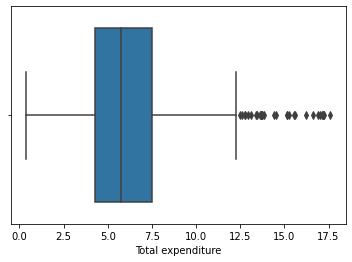

count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64


In [22]:
# type your code here
sns.boxplot(df_life_exp['Total expenditure'])
plt.show()
print(df_life_exp['Total expenditure'].describe())

In [23]:
def get_extreme_val(data):
    q1, q3 = data.quantile([.25, .75])
    iqr = q3-q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    extreme_Values = [x for x in data 
                      if ((x < lb) | (x > ub))]
    print("Q1 :" ,q1, "\tQ3 :" ,q3,"\nIQR :" ,iqr, "\tLB :" ,lb,"\tUB :", ub, "\nNumber of extVals :", len(extreme_Values))
    print('Exteme Values :',extreme_Values)
    return extreme_Values

In [24]:
ext_vals = get_extreme_val(df_life_exp['Total expenditure'])

Q1 : 4.26 	Q3 : 7.4925 
IQR : 3.2325 	LB : -0.5887500000000001 	UB : 12.341249999999999 
Number of extVals : 32
Exteme Values : [13.66, 14.39, 12.6, 13.73, 17.24, 13.71, 13.38, 12.77, 13.76, 13.83, 13.44, 12.94, 12.8, 12.49, 13.13, 13.63, 16.61, 17.14, 16.9, 17.2, 17.6, 17.2, 17.0, 16.2, 15.57, 15.27, 15.15, 15.14, 15.6, 14.55, 13.73, 13.7]


In [25]:
print("Yes, there are '", len(ext_vals), "' extreme values in 'Total expenditure'")

Yes, there are ' 32 ' extreme values in 'Total expenditure'


###  INFERENCE: <font color='blue'> Box plot of 'Total expenditure' shows that there are some values outside of Upper bound. </font>

#### 3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	(2 marks)

In [26]:
def index_of_extreme_values(data, extreme_Values):
    return [ data[data['Total expenditure'] == x].index[0] 
                           for x in data['Total expenditure'] 
                           if (x in extreme_Values)]

In [27]:
# type your code here
while (len(ext_vals) > 0):
    ext_vals = get_extreme_val(df_life_exp['Total expenditure'])
    indexes = index_of_extreme_values(df_life_exp, ext_vals)
    print(indexes,'\n--------------------------------------------------------\n\n')
    df_life_exp.drop(index = indexes, inplace=True)
    df_life_exp.reset_index(inplace=True, drop=True)

Q1 : 4.26 	Q3 : 7.4925 
IQR : 3.2325 	LB : -0.5887500000000001 	UB : 12.341249999999999 
Number of extVals : 32
Exteme Values : [13.66, 14.39, 12.6, 13.73, 17.24, 13.71, 13.38, 12.77, 13.76, 13.83, 13.44, 12.94, 12.8, 12.49, 13.13, 13.63, 16.61, 17.14, 16.9, 17.2, 17.6, 17.2, 17.0, 16.2, 15.57, 15.27, 15.15, 15.14, 15.6, 14.55, 13.73, 13.7]
[1386, 1496, 1573, 1603, 1650, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 2108, 2109, 2303, 2312, 2713, 2795, 2796, 2797, 2798, 2797, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 1603, 2809] 
--------------------------------------------------------


Q1 : 4.2524999999999995 	Q3 : 7.43 
IQR : 3.1775 	LB : -0.5137500000000008 	UB : 12.19625 
Number of extVals : 5
Exteme Values : [12.24, 12.23, 12.25, 17.2, 13.73]
[1384, 1385, 2292, 2778, 2779] 
--------------------------------------------------------


Q1 : 4.25 	Q3 : 7.43 
IQR : 3.1799999999999997 	LB : -0.5199999999999996 	UB : 12.2 
Number of extVals : 0
Exteme Values : []
[] 
-------------------

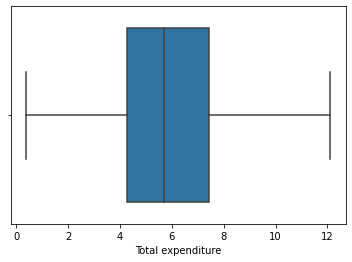

count    2677.000000
mean        5.825771
std         2.303350
min         0.370000
25%         4.250000
50%         5.710000
75%         7.430000
max        12.110000
Name: Total expenditure, dtype: float64


In [28]:
sns.boxplot(df_life_exp['Total expenditure'])
plt.show()
print(df_life_exp['Total expenditure'].describe())

###  INFERENCE: <font color='blue'> There are some extreme values outside of upper/lower bound and it was removed in a loop, till the external values gets removed. </font>


#### 4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b> (2 mark)

**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [29]:
# type your code here
df_x = df_life_exp.drop(['Life expectancy'], axis=1)
df_x.columns

Index(['Country', 'Year', 'Status', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [30]:
df_y = df_life_exp['Life expectancy']

###  INFERENCE: <font color='blue'> 'df_x' contains all independent variables (21 features) except 'Life expectancy'. 'df_y' has only target variable (1 feature) 'Life expectancy'. </font>


#### 5. Split the independent variables into two sets with the proportion of 70:30 (2 mark)

In [31]:
# type your code here
df_x_1, df_x_2 = train_test_split(df_x, test_size=0.30, random_state=40)
print(df_x_1.shape)
print(df_x_2.shape)

(2032, 21)
(871, 21)


### INFERENCE: <font color='blue'> 'xtrain' has 70 percentage of input data i.e., 2032/2903 rows and 'xtest' contains 30 percentage of input data i.e., 871/2903 rows . </font>


#### 6. How would you treat the missing values in the variable 'GDP'?</b> (2 marks)

In [32]:
# type your code here
df_life_exp['GDP'].isnull().sum()

424

In [33]:
df_life_exp['GDP'].describe()

count      2479.000000
mean       7508.225266
std       14296.068366
min           1.681350
25%         464.674822
50%        1774.336730
75%        5937.373389
max      119172.741800
Name: GDP, dtype: float64

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Corelation between Percentage expenditure and GDP")
sns.scatterplot(data=df_life_exp, x='Percentage expenditure', y ='GDP')
plt.subplot(1,2,2)
plt.title("Distribution of GDP before imputation")
sns.distplot(df_life_exp['GDP'])
plt.tight_layout()
plt.show()
print("corr : ",df_life_exp['Percentage expenditure'].corr(df_life_exp['GDP']))

corr :  0.899396380118142


In [35]:
imp = KNNImputer(n_neighbors=2)
after_imp = pd.DataFrame(imp.fit_transform(df_life_exp[['Percentage expenditure', 'GDP']]))
df_life_exp['GDP'] = list(after_imp[1])
df_life_exp['GDP'].describe()

count      2903.000000
mean       6983.308456
std       13271.333568
min           1.681350
25%         575.384106
50%        2977.115300
75%        4855.459715
max      119172.741800
Name: GDP, dtype: float64

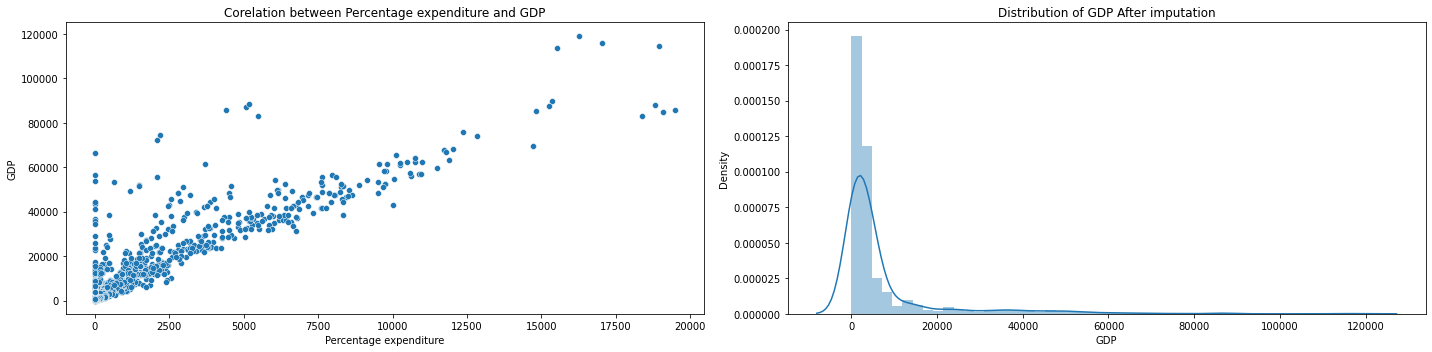

corr :  0.8993058263925546


In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Corelation between Percentage expenditure and GDP")
sns.scatterplot(data=df_life_exp, x='Percentage expenditure', y ='GDP')
plt.subplot(1,2,2)
plt.title("Distribution of GDP After imputation")
sns.distplot(df_life_exp['GDP'])
plt.tight_layout()
plt.show()
print("corr : ",df_life_exp['Percentage expenditure'].corr(df_life_exp['GDP']))

###  INFERENCE: <font color='blue'> While analysing the dataset, we saw 'Percentage expenditure' was calculated based on GDP and it had zero null values. We found correlation between 'Percentage expenditure' and 'GDP', which showed high correation. (nearly 90%). So we imputed null values in 'GDP' using KNN imputation. </font>

#### 7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values (2 marks)

In [37]:
df_life_exp['Status'].isnull().sum()

16

In [68]:
set_of_developing_countries = set(df_life_exp[df_life_exp['Status'] == 'Developing']['Country'].unique())
set_of_developed_countries = set(df_life_exp[df_life_exp['Status'] == 'Developed']['Country'].unique())
print('\nNumber of countries :', len(df_life_exp['Country'].unique()))
print('\nCount of unique developing countries : ', len(set_of_developing_countries))
print('Count of unique developed countries : ', len(set_of_developed_countries))
print('\nNumber of null values in status :' ,df_life_exp['Status'].isnull().sum())
print('\nIntersection between them : ', len(set_of_developing_countries.intersection(set_of_developed_countries)))


Number of countries : 193

Count of unique developing countries :  161
Count of unique developed countries :  32

Number of null values in status : 16

Intersection between them :  0


In [38]:
df_life_exp.groupby(by='Country').describe(include = 'object')['Status']['top']['Afghanistan']

'Developing'

In [39]:
index_of_null_status = df_life_exp[df_life_exp['Status'].isnull()].index
for i in index_of_null_status:
    if np.isnan(df_life_exp['Status'][i]):
        df_life_exp['Status'][i] =  df_life_exp.groupby(by='Country').describe(include = 'object')['Status']['top'][df_life_exp['Country'][i]]

In [40]:
df_life_exp.iloc[index_of_null_status]

Country  Year      Status  Life expectancy  Adult mortality  \
6             Afghanistan  2009  Developing             58.6            281.0   
15            Afghanistan  2000  Developing             54.8            321.0   
27                Albania  2004  Developing             73.0             17.0   
46                Algeria  2001  Developing             71.4            145.0   
65    Antigua and Barbuda  2014  Developing             76.2            131.0   
75    Antigua and Barbuda  2004  Developing             74.4            149.0   
82              Argentina  2013  Developing             76.0            119.0   
93              Argentina  2002  Developing             74.1            138.0   
104               Armenia  2007  Developing             73.5            132.0   
118             Australia  2009   Developed             81.7             66.0   
136               Austria  2007   Developed             81.0              8.0   
148            Azerbaijan  2011  Developing             71.6            125.0   
458            Cabo Verde  2005  Developing             71.8            134.0   
1129                Haiti  2008  Developing             62.1            259.0   
1989             Paraguay  2003  Developing             71.7            166.0   
2054             Portugal  2002   Developed             77.2             17.0   

      Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  \
6                77     0.01               56.762217         63.0     2861   
15               88     0.01               10.424960         62.0     6532   
27                1     4.54              221.842800         99.0        7   
46               20     0.23              147.986071          NaN     2686   
65                0     8.56             2422.999774         99.0        0   
75                0     7.28               22.862952         97.0        0   
82                8     8.28             1001.796332         94.0        0   
93               12     7.81              470.186915         66.0        0   
104               1     3.99               44.572200         85.0        1   
118               1    10.62             7172.275229         94.0      104   
136               0    12.50             7453.864400         85.0       20   
148               5     1.98              263.142699         84.0        0   
458               0     4.26                3.349817         93.0        0   
1129             16     5.95               63.831957          NaN        0   
1989              4     6.64              155.423308         86.0        0   
2054              1    12.00             1904.002310         82.0        8   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS           GDP  \
6     ...   63.0               9.42        63.0       0.1    445.893298   
15    ...   24.0               8.20        24.0       0.1    114.560000   
27    ...   98.0               6.38        97.0       0.1   2416.588235   
46    ...   89.0               3.84        89.0       0.1   1732.857979   
65    ...   96.0               5.54        99.0       0.2  12888.296670   
75    ...   97.0               4.21        97.0       0.1   1352.837400   
82    ...   99.0               4.99        94.0       0.1  12976.636420   
93    ...   94.0               8.31        93.0       0.1   2579.193168   
104   ...    9.0               4.31        88.0       0.1   3138.887300   
118   ...   92.0               9.50        92.0       0.1  42742.998980   
136   ...   85.0               1.40        85.0       0.1  46586.652500   
148   ...   91.0               5.10        87.0       0.1   7189.691229   
458   ...   95.0               4.86        95.0       0.8    248.134590   
1129  ...   64.0               5.92        63.0       2.4    674.756415   
1989  ...   86.0               5.99        86.0       0.1   1174.779347   
2054  ...   96.0               9.15        98.0       0.1  12882.288970   

      Population  Thinness  1-19 year

### INFERENCE: <font color='blue'> First we found out if there is any country with both 'Developed' and 'Developing' status through intersection and output was zero. Then we checked the dataset and found that 'Status' value was missing for countries for few years and it was present in another year. For eg: For country 'Afghanisthan' Status was missing for years '2000' and '2009' but status is 'Developing' for rest all years for Afghanistan.</font>
   

#### 8. Define a function to find the extreme values in alcohol consumption (2 marks)

In [41]:
ext_values  = get_extreme_val(df_life_exp['Alcohol'])
print("\n\nYes, there are '", len(ext_values), "' extreme values in 'Total expenditure'")

Q1 : 0.87 	Q3 : 7.65 
IQR : 6.78 	LB : -9.3 	UB : 17.82 
Number of extVals : 1
Exteme Values : [17.87]


Yes, there are ' 1 ' extreme values in 'Total expenditure'


### INFERENCE: <font color='blue'> Column 'Alcohol' has only one extreme value i.e., '17.87'and it lies outside Upper bound. Value of Upper bound is '17.82'.</font>


#### 9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy (3 marks) 

In [42]:
# type your code here
df_life_exp['Life expectancy'].describe()

count    2895.000000
mean       69.217133
std         9.511732
min        36.300000
25%        63.050000
50%        72.100000
75%        75.600000
max        89.000000
Name: Life expectancy, dtype: float64

In [43]:
df_life_exp['Life expectancy'].fillna(np.nan, inplace=True)

In [44]:
q0,q1,q2,q3 = df_life_exp['Life expectancy'].quantile([0,1/3,2/3,1])
df_life_exp['Life_expectancy_level'] = pd.cut(df_life_exp['Life expectancy'], [q0-1,q1,q2,q3], labels=['low', 'medium', 'high'])

In [45]:
df_temp = df_life_exp['Life_expectancy_level'].value_counts(dropna=True)

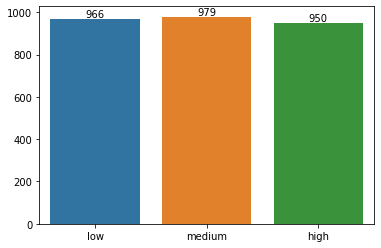

In [46]:
ax = sns.barplot(x = df_temp.index, y = df_temp.values)
plt.bar_label(ax.containers[0])
plt.show()

### <font color='blue'> Life expectancy level 'Low' has values from 0 to first quartile (i.e., 66.6).</font>
    
### <font color='blue'> Life expectancy level 'Medium' has values from 66.7 to second quartile (i.e., 74.4).</font>
    
### <font color='blue'> Life expectancy level 'High' has values from 74.5 to maximum value (i.e., 89).</font>

#### 10. Check how life expectancy has changed over the years in China</b>    ( 2marks)  

In [47]:
# type your code here
df_life_exp_china = df_life_exp[df_life_exp['Country'] == 'China']
df_life_exp_china

Country  Year      Status  Life expectancy  Adult mortality  \
560   China  2015  Developing             76.1             85.0   
561   China  2014  Developing             75.8             86.0   
562   China  2013  Developing             75.6             88.0   
563   China  2012  Developing             75.4             89.0   
564   China  2011  Developing             75.2             91.0   
565   China  2010  Developing             75.0             92.0   
566   China  2009  Developing             74.9             93.0   
567   China  2008  Developing             74.5             97.0   
568   China  2007  Developing             74.4             96.0   
569   China  2006  Developing             74.2             98.0   
570   China  2005  Developing             73.9             99.0   
571   China  2004  Developing             73.5             11.0   
572   China  2003  Developing             73.1             13.0   
573   China  2002  Developing             72.7             16.0   
574   China  2001  Developing             72.2             11.0   
575   China  2000  Developing             71.7            115.0   

     Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  \
560            157      NaN                0.000000         99.0    42361   
561            171     5.78              109.874390         99.0    52628   
562            185     5.79                9.955532         99.0    26883   
563            201     5.74               94.434457         99.0     6183   
564            215     5.63               91.267498         99.0     9943   
565            231     5.75                5.660755         99.0    38159   
566            248     4.88               50.283489         99.0    52461   
567            266     4.27               39.225097         95.0   131441   
568            285     3.88              312.662482         92.0   109023   
569            307     3.28               29.743430         91.0    99602   
570            332     2.92              171.659603         84.0   124219   
571            360     3.04                1.586685         79.0    70549   
572            391     2.96              122.936535         75.0    71879   
573            422     2.91              106.359036          7.0    58341   
574            457     2.84               14.230645         65.0    88962   
575            490     3.06               17.460574          6.0    71093   

     ...  Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
560  ...                NaN        99.0       0.1   869.211938    137122.0   
561  ...               5.55        99.0       0.1  7683.523800    136427.0   
562  ...               5.39        99.0       0.1   777.775940    135738.0   
563  ...               5.26        99.0       0.1  6337.882993    135695.0   
564  ...               5.30        99.0       0.1  5633.796160    134413.0   
565  ...               4.89        99.0       0.1   456.512487    133775.0   
566  ...               5.80        99.0       0.1  3838.434292    133126.0   
567  ...               4.59        97.0       0.1  3471.247547   1324655.0   
568  ...               4.32        93.0       0.1  2695.366223   1317885.0   
569  ...               4.52        93.0       0.1   299.229676     13112.0   
570  ...               4.66        87.0       0.1  1753.417800     13372.0   
571  ...               4.72        87.0       0.1   158.668462    129675.0   
572  ...               4.82        86.0       0.1  1288.642924     12884.0   
573  ...               4.79        86.0       0.1  1148.585700      1284.0   
574  ...               4.56        86.0       0.1   153.182400    127185.0   
575  ...               4.60        85.0       0.1   959.372181   1262645.0   

     Thinness  1-19 years  Thinness 5-9 years  \
560                   3.6                 2.9   
561                   3.7                 3.0   
562                   3.8                 3.2   
563                   3.9      

In [48]:
df_life_exp_china.sort_values(by='Year', inplace=True)

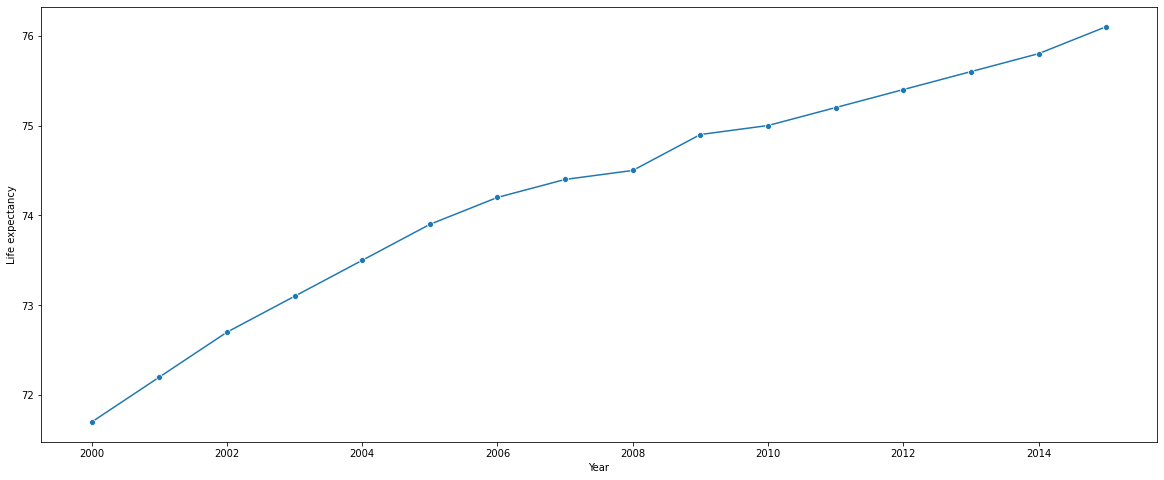

In [49]:
plt.figure(figsize=(20,8))
sns.lineplot(x ='Year', y ='Life expectancy', data=df_life_exp_china, marker='o')
plt.show()

###  INFERENCE: <font color='blue'>From the above line plot, we can conclude that 'Life expectancy' of China has increased over the years. In other words, in a span of 14 years, life expectancy of people has increased from 71 to 76.</font>

#### 11. How transformation affect the distribution of the data points, take any one column and explore it? (3 marks)  

In [70]:
# type your code here
df_life_exp['Total_exp_transformed']=df_life_exp['Total expenditure'].transform(func='square')


Before Transformation 

count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64


--------------------------------------------
After Transformation 

count    2712.000000
mean       41.501395
std        35.101272
min         0.136900
25%        18.147600
50%        33.120050
75%        56.137575
max       309.760000
Name: Total_exp_transformed, dtype: float64


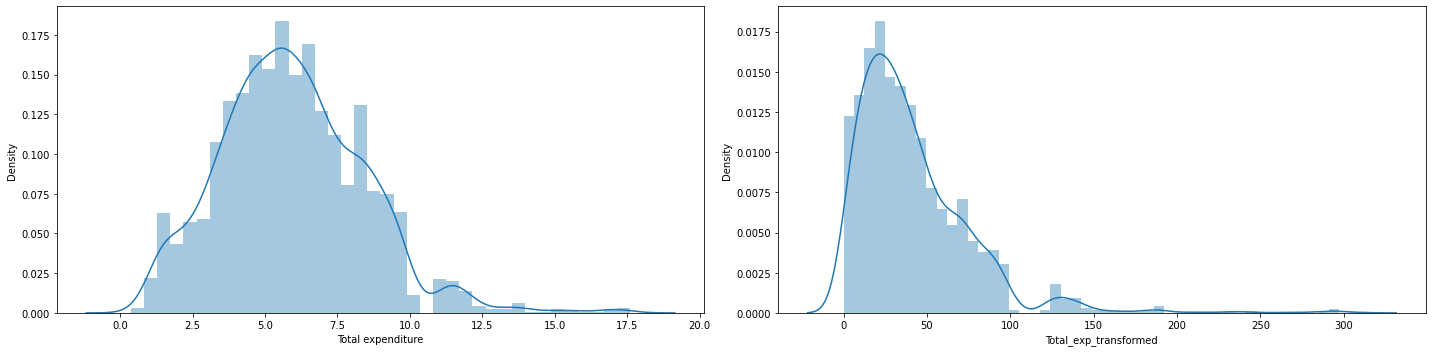

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df_life_exp['Total expenditure'])
print('Before Transformation \n')
print(df_life_exp['Total expenditure'].describe())
plt.subplot(1,2,2)
sns.distplot(df_life_exp['Total_exp_transformed'])
print('\n\n--------------------------------------------\nAfter Transformation \n')
print(df_life_exp['Total_exp_transformed'].describe())
plt.tight_layout()
plt.show()

###  INFERENCE: <font color='blue'>The transform() function is used to call function on self producing a Series with transformed values and that has the same axis length. This function is used for transforming the data. If a function, must either work when passed a Series or when passed to Series.</font>
   
###   <font color='green'>Lets consider feature 'Total expenditure' and square the values of data points through 'transform' function. When we compare 'Total expenditure' and 'Total_exp_transformed' through describe(),we can see that each data point has been squared. Mean has increased 6.5 times from original value and standard deviation has increased drastically (18 times) from original value. The distribution has been affected for the transformed feature, as we are unable to see a proper bell-shaped curve.</font>
